<H1 style="background-color:#00008b;color:#F8F8FF;">Project Report - Phillip Marsh</H1>
<hr>

<H2 style="color:#00008b;">GitHub URL</H2>
Phillip's GutHub can be found at: <a href="https://github.com/PhillipNM/UCDPA_PhillipMarsh" target="_blank">Phillip's GitHub Repository</a>
<pre style="font-family:arial;">
document should contain between 1,500 and 2,00 words
</pre>
<h2 style="color:#00008b;">Abstract</h2>
(short overview of the entire project)

<h2 style="color:#00008b;">Introduction</h2>
(Explain why you chose this project use case)

<h2 style="color:#00008b;">Datasets</h2>
(Provide a description of your dataset and source. Also justify why you chose this source)

<h6>Deciding on the dataset</h6>
<br>
I had several ideas, however, I explored three main ideas:

<pre style="font-family:arial;">
1. Predicting currency fx changes to maximise buys and sells.
As I have two children in Canada in university the fx rate for USD to CAD is always top of mind.  After exploring this for a bit the challenge to understand the market conditions that I could use for making predictions did not seem to fit well with what I needed for this project.
2. Flight delays, cancellations and the average compensation.  Are the airlines "gaming" the system to not pay-out customers given the turmoil in travel I thought it would be interesting to compare recent cancellations, delays and reasons and compensations vs. pre-covid data. I researched for datasets but could not find anything current, although there were some sites that may have had data; I would have to pay for and for this reason I decided against this topic.
3. COVID data.  This idea would have plenty of source data out there but would it offer the ability to make predictions and not just forecasting trends.
</pre>

<h6>COVID Data</h6>
   I picked the COVID idea as there is good data and the types of calculations and techniques required would lend itself to the project easily. This data is something we are all very familiar with at this time. Governments, countries, organizations and corporations have struggled with rules and regulations trying to balance controlling the epidemic vs. economic stability.

I reviewed a couple of sources and in the end selected "Our World In Data" (OWID).  OWID has a comprehensive set of publicly available data specifically for COVID.  In working with the FIL business continuity team, I assited with the COVID response. I came across this data source and found it very useful. In the end this is the source we used to provide global situational updates for the senior members in the organization so they could decide on stay at home and return to office responses for each jurisdiction across the organization.

source of covid data: https://github.com/owid/covid-19-data/tree/master/public/data 
<p>Originally I downloaded a (.csv) copy of the data to use but the file was large (I was getting an error that the file was to big for my type of GitHub repository account) when I tried to push the data to my GitHub repository.  I then researched how I could link to an external csv file, and this solved the problem</p>

source of GDP data: https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?year_high_desc=false
<p>the file is a zip file which is difficult to connect to so in this case I downloaded the file and unzipped it.</p>


<h2 style="color:#00008b;">Implementation Process</h2>
(describe your entire process in detail)

<h6>Hypothesis</h6>
My hypothesis is that countries with higher population density and lower GDP have higher mortality rates than for higher density higher GDP countries. It would also be interesting to see how lower density and higher GDP countries fared and if density and GDP are a predicor of mortaility for a disease like COVID

<pre style="font-family:arial;">
The implementation process I followed was
    Gather Data
    Transform & clean
    Explore
    Analyze and build models
</pre
>    
<h6>Gather Data</h6>
There are several measures I need for my analysis if any of the data sets include 0 values for total I will use the prior days data as total are cumlative
<pre style="font-family:arial;">
Measures for each country:
    Highest Cases per 100k people: for year end 2020, 2021 and latest 2022
    Highest Deaths per 100k people: for year end 2020, 2021 and latest 2022
    Lowest Cases per 100k people: for year end 2020, 2021 and latest 2022
    Lowest Deaths per 100k people: for year end 2020, 2021 and latest 2022
    Look at the 14 day rolling average cases per 100k people over time
    Look at the 14 day rolling average deaths per 100k people over time
    Population density
    GDP per person
</pre>
<h6>Transform & clean and Explore</h6>
<h6>Analyze and build models</h6>
Take the top 20: 
    Categorize as Highest, Lowest Countries for Cases, Deaths and mege into a data set to run analysis and correlations
    Create a High/Low GDP Category
    Create a High/Low Population Density Category

Run agaisnt the machine learnng logic for insights


<h3>Import and review the data</h3>

In [1]:
# Import packages needed for project:
import pandas as pd
import requests
import io
import datetime as dt
from datetime import datetime
from datetime import timedelta
import numpy as np
from collections import Counter
import re
import sklearn

# Visualization
import matplotlib.pyplot as plt
# import matplotlib.animation as animation
import seaborn as sns

# Machine learning
#from sklearn.module import Model
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier






In [2]:
# Global Variables

column_count_limit=30 #number of columns deemed to be managble for exploring data


#number of days used in rolling average default = 14 but could change to 25,30 etc depending on what timeframe is reviewed
days_calc = 14 #n days for calculations. 

top_n_parameter = 10 #variable to use for select the number of top and bottom records

pop_per_100k = 100000 #varibale to set for total cases and deaths per population

#for calculations relating to mortality
high_deaths_per_100k = 50
low_deaths_per_100k = 10

<h4>Gather data</h4>

In [3]:
# Import COVID data

# Link and download COVID dataset from OWID
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv" 
download = requests.get(url).content

# Create the COVID as a pandas dataframe
covid_data_raw = pd.read_csv(io.StringIO(download.decode('utf-8')),parse_dates=['date']) #need to parse the date field
#source: https://stackoverflow.com/questions/59004960/converting-date-format-in-a-dataframe-from-a-csv-file


In [4]:
# Import World Bank GDP data
    # source: https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?year_high_desc=false

    # Create the GDP raw file as a pandas dataframe, headers start on row 4
gdp_data_raw = pd.read_csv("/Users/Phillip/UDCPA_PhillipMarsh/data/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_4489151.csv", skiprows=4)


In [5]:
#global calculation


# What are the range of dates in data
beg_date = min(covid_data_raw["date"]) #starting point of the available data
end_date = max(covid_data_raw["date"]) #most recent data in the file

#calculate the last observation form the covid data, this data is dynamic and new data comes in each day, however, 
#it can take time for new data to roll in.  This report is using the last date available less 2 days 
last_date = end_date - timedelta(2) 

<h5>Exploring the data</h5>

Review the headers, number of headers, type of data to undestand more about the data available

In [6]:
# name of a dataframe with comment before and after

def name_obj(df, comment, comment2=""):
    """Create statement naming the dataframe around comment and comment2
    
    Args:
        df (dataFrame): the name of the dataframe
        comment (string): comment string which goes before the name of the dataframe
        comment2 (string): comment string which goes after the name of the dataframe (optional)
    """
    name =[x for x in globals() if globals()[x] is df][0]
    return (comment+name+comment2)

covid_data_raw_name = name_obj(covid_data_raw,"Dataframe Name is:")
gdp_data_raw_name = name_obj(gdp_data_raw,"Dataframe Name is:")

#example: test the function
print(covid_data_raw_name)
print(gdp_data_raw_name)

Dataframe Name is:covid_data_raw
Dataframe Name is:gdp_data_raw


In [7]:
# create functions for reviewing dataframe headers

# create a function to make list from the column header names of a dataframe
def column_headers_list(df):
    """create a list of column headers
    
    Args:
        df (DataFrame): the name of the dataframe to use
    
    Returns:
        list of column headers
    """
    
    columns_lst = df.columns.tolist() # create a list of the column headers from the dataframe
        
    return columns_lst


In [8]:
# Count the number of items in the list from the column header names list of a dataframe

#test the function "column_headers_list"

# Raw Covid data 
columns_lst_test = column_headers_list(covid_data_raw)
columns_len_test = len(columns_lst_test)

# Test function
print(columns_lst_test)
print(columns_len_test)


# Raw gdp data 
columns_lst_test = column_headers_list(gdp_data_raw)
print("There are :"+str(columns_len_test)+" header records")

# Test function
print(columns_lst_test)
print("There are :"+str(columns_len_test)+" header records")



['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_

In [9]:
# create a function determine if the data set is too wide
def columns_comment(xlist,column_count_limit=30):
    """Use column_len to decide if the dataframe is too large to manage
    
    Args:
        xlist(list): list to review
        columns_len(int): from column_headers_list function
        column_count_limit(float): limi number of columns to compare
    """
    columns_len = len(xlist)
    
    if columns_len>column_count_limit:
        comment = "There are many columns ("+str(columns_len)+"), Drop a some of them to imporve performance and the size of the file"
    else:
        comment = "Number of columns appears manageable"
    
    return comment, columns_len



In [10]:
#test function columns_comment()

# test for covid data
columns_lst_covid = column_headers_list(covid_data_raw) #list of headers

comment_covid = columns_comment(columns_lst_covid,)[0] #Comment string
header_len_covid = columns_comment(columns_lst_covid,column_count_limit=30)[1] #Number of items in list

print(comment_covid)

print("-"*100)

There are many columns (67), Drop a some of them to imporve performance and the size of the file
----------------------------------------------------------------------------------------------------


In [11]:
# test for gdp data
columns_lst_gdp = column_headers_list(gdp_data_raw)

comment_gdp = columns_comment(columns_lst_gdp)[0]
header_len_gdp = columns_comment(columns_lst_gdp,column_count_limit=30)[1]


print(comment_gdp)

print("-"*100)

There are many columns (67), Drop a some of them to imporve performance and the size of the file
----------------------------------------------------------------------------------------------------


In [12]:
# Understanding the data 

# Information (shape) on are the records + columns

# covid raw data
print(covid_data_raw.shape)

# gdp raw data
print(gdp_data_raw.shape)

(217278, 67)
(266, 67)


In [13]:
# review Covid raw data

# show the column headers and the number of columns

data = covid_data_raw

columns_len = data.shape[1] # count the number of columns in the list

covid_name = name_obj(data,"The headers from the", "Dataframe are:")
print(column_headers_list(data))

print()

description_covid_raw = name_obj(data,"The "," DataFrame has "+str(columns_len)+" columns")
print(description_covid_raw)

print()

#print(columns_comment(column_headers_list(df))) #xlist,column_count_limit=30)

['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_

In [14]:
# Summary of covid_data_raw file
rows = covid_data_raw.shape[0]
cols = covid_data_raw.shape[1]

print("The raw data file has {} rows of data".format(f"{rows:,d}")," and {} columns".format(f"{cols:,d}"))
if cols>column_count_limit:
    print("There are many columns, drop a some of them to imporve performance and the size of the file")
else:
    print("Number of columns appears manageable")

The raw data file has 217,278 rows of data  and 67 columns
There are many columns, drop a some of them to imporve performance and the size of the file


In [15]:
# drop columns
    #source: https://datatofish.com/drop-columns-pandas-dataframe/#:~:text=Here%20is%20the%20approach%20that%20you%20can%20use,Python%20code%20to%20drop%20the%20%E2%80%98Shape%E2%80%99%20column%20is%3A
covid_data = covid_data_raw.drop([
    'continent',
    'new_cases_smoothed',
    'new_deaths_smoothed',
    'new_cases_smoothed_per_million',
    'new_deaths_smoothed_per_million',
    'icu_patients_per_million',
    'hosp_patients',
    'hosp_patients_per_million',
    'weekly_icu_admissions',
    'weekly_icu_admissions_per_million',
    'weekly_hosp_admissions',
    'weekly_hosp_admissions_per_million',
    'total_tests_per_thousand',
    'new_tests_per_thousand',
    'new_tests_smoothed',
    'tests_per_case',
    'tests_units',
    'new_vaccinations_smoothed',
    'total_vaccinations_per_hundred',
    'people_vaccinated_per_hundred',
    'people_fully_vaccinated_per_hundred',
    'total_boosters_per_hundred',
    'new_vaccinations_smoothed_per_million',
    'new_people_vaccinated_smoothed',
    'new_people_vaccinated_smoothed_per_hundred',
    'stringency_index','median_age',
    'aged_65_older',
    'aged_70_older',
    'cardiovasc_death_rate',
    'diabetes_prevalence',
    'female_smokers',
    'male_smokers',
    'handwashing_facilities',
    'hospital_beds_per_thousand',
    'life_expectancy',
    'human_development_index',
    'excess_mortality_cumulative_absolute',
    'excess_mortality_cumulative',
    'excess_mortality',
    'excess_mortality_cumulative_per_million',
    'total_cases_per_million',
    'new_cases_per_million',
    'total_deaths_per_million',
    'new_deaths_per_million',
    'reproduction_rate',
    'people_vaccinated',
    'total_boosters',
    'new_vaccinations',
    'new_tests_smoothed_per_thousand',
    'new_tests',
    'positive_rate'
    ], 
    axis=1)

covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217278 entries, 0 to 217277
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   iso_code                 217278 non-null  object        
 1   location                 217278 non-null  object        
 2   date                     217278 non-null  datetime64[ns]
 3   total_cases              208374 non-null  float64       
 4   new_cases                208083 non-null  float64       
 5   total_deaths             189322 non-null  float64       
 6   new_deaths               189247 non-null  float64       
 7   icu_patients             27677 non-null   float64       
 8   total_tests              79387 non-null   float64       
 9   total_vaccinations       60774 non-null   float64       
 10  people_fully_vaccinated  55335 non-null   float64       
 11  population               216007 non-null  float64       
 12  population_densi

In [16]:
# all but the first three columns are float objects; two: "iso_code", "location" are country specific categories
# create a function to get a list of unique values

# Function to get unique values
  
  
def unique(list1):
  
    # Print directly by using * symbol
    print(*Counter(list1))


In [17]:
#list of covid countrie ISO code

# sort by ISO_code and Date
covid_data = covid_data.sort_values(['iso_code', 'location', 'date'])

#create a list of country codes from the covid data
Country_lst_covid_1 = covid_data["iso_code"].tolist()

# list the country codes    
country_iso_list = unique(Country_lst_covid_1)


ABW AFG AGO AIA ALB AND ARE ARG ARM ATG AUS AUT AZE BDI BEL BEN BES BFA BGD BGR BHR BHS BIH BLR BLZ BMU BOL BRA BRB BRN BTN BWA CAF CAN CHE CHL CHN CIV CMR COD COG COK COL COM CPV CRI CUB CUW CYM CYP CZE DEU DJI DMA DNK DOM DZA ECU EGY ERI ESH ESP EST ETH FIN FJI FLK FRA FRO FSM GAB GBR GEO GGY GHA GIB GIN GMB GNB GNQ GRC GRD GRL GTM GUM GUY HKG HND HRV HTI HUN IDN IMN IND IRL IRN IRQ ISL ISR ITA JAM JEY JOR JPN KAZ KEN KGZ KHM KIR KNA KOR KWT LAO LBN LBR LBY LCA LIE LKA LSO LTU LUX LVA MAC MAR MCO MDA MDG MDV MEX MHL MKD MLI MLT MMR MNE MNG MNP MOZ MRT MSR MUS MWI MYS NAM NCL NER NGA NIC NIU NLD NOR NPL NRU NZL OMN OWID_AFR OWID_ASI OWID_CYN OWID_EUN OWID_EUR OWID_HIC OWID_INT OWID_KOS OWID_LIC OWID_LMC OWID_NAM OWID_OCE OWID_SAM OWID_UMC OWID_WRL PAK PAN PCN PER PHL PLW PNG POL PRI PRK PRT PRY PSE PYF QAT ROU RUS RWA SAU SDN SEN SGP SHN SLB SLE SLV SMR SOM SPM SRB SSD STP SUR SVK SVN SWE SWZ SXM SYC SYR TCA TCD TGO THA TJK TKL TKM TLS TON TTO TUN TUR TUV TWN TZA UGA UKR URY USA UZB V

In [18]:
# Review of this object shows there are some ISO_Codes that are more than the standard 3 char length, these should be removed
# these are related to OWID codes for regional aggregations of country data, they can be removed
# convert to strin and find the OWID character pattern or the pattern is not 3 letters \w\w\w

#find_non_ISO_codes = re.complie(r')
#re.search(r"'OWID",country_iso_list)

In [19]:
# drop the "OWID_" records

# how many records have the OWID ISO_Code?
covid_data_owid = covid_data[covid_data["iso_code"].str.contains("OWID")] #OWID data
print("OWID data shape: "+str(covid_data_owid.shape))

covid_data = covid_data[covid_data["iso_code"].str.contains("OWID")==False] #Non OWID data
print("Non OWID data shape: "+str(covid_data.shape))


OWID data shape: (13739, 15)
Non OWID data shape: (203539, 15)


In [20]:

# list the country ISO Codes again
Country_lst_covid_1 = covid_data["iso_code"].tolist()

#re-run the unique records; OWID records are no longer displayed
country_ISO_list = unique(Country_lst_covid_1)

ABW AFG AGO AIA ALB AND ARE ARG ARM ATG AUS AUT AZE BDI BEL BEN BES BFA BGD BGR BHR BHS BIH BLR BLZ BMU BOL BRA BRB BRN BTN BWA CAF CAN CHE CHL CHN CIV CMR COD COG COK COL COM CPV CRI CUB CUW CYM CYP CZE DEU DJI DMA DNK DOM DZA ECU EGY ERI ESH ESP EST ETH FIN FJI FLK FRA FRO FSM GAB GBR GEO GGY GHA GIB GIN GMB GNB GNQ GRC GRD GRL GTM GUM GUY HKG HND HRV HTI HUN IDN IMN IND IRL IRN IRQ ISL ISR ITA JAM JEY JOR JPN KAZ KEN KGZ KHM KIR KNA KOR KWT LAO LBN LBR LBY LCA LIE LKA LSO LTU LUX LVA MAC MAR MCO MDA MDG MDV MEX MHL MKD MLI MLT MMR MNE MNG MNP MOZ MRT MSR MUS MWI MYS NAM NCL NER NGA NIC NIU NLD NOR NPL NRU NZL OMN PAK PAN PCN PER PHL PLW PNG POL PRI PRK PRT PRY PSE PYF QAT ROU RUS RWA SAU SDN SEN SGP SHN SLB SLE SLV SMR SOM SPM SRB SSD STP SUR SVK SVN SWE SWZ SXM SYC SYR TCA TCD TGO THA TJK TKL TKM TLS TON TTO TUN TUR TUV TWN TZA UGA UKR URY USA UZB VAT VCT VEN VGB VIR VNM VUT WLF WSM YEM ZAF ZMB ZWE


In [21]:
# no longer seeing the OWID codes

In [22]:
# show the column headers and the number of columns

df_head = covid_data

columns_len = df_head.shape[1] # count the number of columns in the list

print(name_obj(df_head,"The headers from the ", " DataFrame are:"))
column_headers_list(df_head)


The headers from the covid_data DataFrame are:


['iso_code',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'total_deaths',
 'new_deaths',
 'icu_patients',
 'total_tests',
 'total_vaccinations',
 'people_fully_vaccinated',
 'population',
 'population_density',
 'gdp_per_capita',
 'extreme_poverty']

In [23]:
# print a summary of covid_data

# Summary of covid_data_raw file
rows = covid_data.shape[0]
cols = covid_data.shape[1]

print("The raw data file has {} rows of data".format(f"{rows:,d}"),"and {} columns".format(f"{cols:,d}"))
if cols>column_count_limit:
    print("There are many columns, drop a some of them to imporve performance and the size of the file")
else:
    print("Number of columns appears manageable")

The raw data file has 203,539 rows of data and 15 columns
Number of columns appears manageable


In [24]:
covid_data.head(5)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,total_tests,total_vaccinations,people_fully_vaccinated,population,population_density,gdp_per_capita,extreme_poverty
9371,ABW,Aruba,2020-03-13,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.8,35973.781,NaN
9372,ABW,Aruba,2020-03-14,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.8,35973.781,NaN
9373,ABW,Aruba,2020-03-15,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.8,35973.781,NaN
9374,ABW,Aruba,2020-03-16,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.8,35973.781,NaN
9375,ABW,Aruba,2020-03-17,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.8,35973.781,NaN


In [25]:
covid_data.tail(5)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,total_tests,total_vaccinations,people_fully_vaccinated,population,population_density,gdp_per_capita,extreme_poverty
217273,ZWE,Zimbabwe,2022-09-13,256904.0,16.0,5596.0,0.0,NaN,NaN,NaN,NaN,15993524.0,42.729,1899.775,21.4
217274,ZWE,Zimbabwe,2022-09-14,256939.0,35.0,5596.0,0.0,NaN,NaN,NaN,NaN,15993524.0,42.729,1899.775,21.4
217275,ZWE,Zimbabwe,2022-09-15,256939.0,0.0,5596.0,0.0,NaN,NaN,NaN,NaN,15993524.0,42.729,1899.775,21.4
217276,ZWE,Zimbabwe,2022-09-16,256939.0,0.0,5596.0,0.0,NaN,NaN,NaN,NaN,15993524.0,42.729,1899.775,21.4
217277,ZWE,Zimbabwe,2022-09-17,256988.0,49.0,5598.0,2.0,NaN,NaN,NaN,NaN,15993524.0,42.729,1899.775,21.4


In [26]:
# Review Null data
# pd.set_option('display.max_rows',None)
print("Null data:")
print(covid_data.isna().sum())

Null data:
iso_code                        0
location                        0
date                            0
total_cases                  8580
new_cases                    8878
total_deaths                27438
new_deaths                  27692
icu_patients               175862
total_tests                124340
total_vaccinations         150747
people_fully_vaccinated    155992
population                      0
population_density          12489
gdp_per_capita              27574
extreme_poverty             89405
dtype: int64


In [27]:
# review of the columns and null data shows iso_code, loaction (country), date, population are fully populated
# population density is not populated for everything, will need to confirm that for the selected date that his is improved
# total_cases, new_cases, total_deaths, new_deaths etc I would expect null data as data would not be available for all 
#countries from the start of the data period, need to convert these to 0's
#need to review "gdp_per_capita" and "population_density" data as that could impact report later on

In [28]:
#Which fields have nan's
covid_data[covid_data.isna().any(axis=1)]


,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,total_tests,total_vaccinations,people_fully_vaccinated,population,population_density,gdp_per_capita,extreme_poverty
9371,ABW,Aruba,2020-03-13,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.800,35973.781,NaN
9372,ABW,Aruba,2020-03-14,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.800,35973.781,NaN
9373,ABW,Aruba,2020-03-15,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.800,35973.781,NaN
9374,ABW,Aruba,2020-03-16,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.800,35973.781,NaN
9375,ABW,Aruba,2020-03-17,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.800,35973.781,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217273,ZWE,Zimbabwe,2022-09-13,256904.0,16.0,5596.0,0.0,NaN,NaN,NaN,NaN,15993524.0,42.729,1899.775,21.4
217274,ZWE,Zimbabwe,2022-09-14,256939.0,35.0,5596.0,0.0,NaN,NaN,NaN,NaN,15993524.0,42.729,1899.775,21.4
217275,ZWE,Zimbabwe,2022-09-15,256939.0,0.0,5596.0,0.0,NaN,NaN,NaN,NaN,15993524.0,42.729,1899.775,21.4
217276,ZWE,Zimbabwe,2022-09-16,256939.0,0.0,5596.0,0.0,NaN,NaN,NaN,NaN,15993524.0,42.729,1899.775,21.4


In [29]:
# review "gdp_per_capita" and "population_density"

covid_data_gdp_pop = covid_data[["date","iso_code","location","population","population_density","gdp_per_capita"]]

covid_data_gdp_pop["population"].isnull()

#covid_data_gdp_pop[covid_data_gdp_pop.isna().any(axis=1)]

9371      False
9372      False
9373      False
9374      False
9375      False
          ...  
217273    False
217274    False
217275    False
217276    False
217277    False
Name: population, Length: 203539, dtype: bool

In [30]:
# drop the NaN for the population and gdp columns
covid_data.dropna(subset=["population","population_density","gdp_per_capita"])
#https://www.datasciencelearner.com/pandas-dropna-remove-nan-rows-python/

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,total_tests,total_vaccinations,people_fully_vaccinated,population,population_density,gdp_per_capita,extreme_poverty
9371,ABW,Aruba,2020-03-13,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.800,35973.781,NaN
9372,ABW,Aruba,2020-03-14,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.800,35973.781,NaN
9373,ABW,Aruba,2020-03-15,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.800,35973.781,NaN
9374,ABW,Aruba,2020-03-16,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.800,35973.781,NaN
9375,ABW,Aruba,2020-03-17,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.800,35973.781,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217273,ZWE,Zimbabwe,2022-09-13,256904.0,16.0,5596.0,0.0,NaN,NaN,NaN,NaN,15993524.0,42.729,1899.775,21.4
217274,ZWE,Zimbabwe,2022-09-14,256939.0,35.0,5596.0,0.0,NaN,NaN,NaN,NaN,15993524.0,42.729,1899.775,21.4
217275,ZWE,Zimbabwe,2022-09-15,256939.0,0.0,5596.0,0.0,NaN,NaN,NaN,NaN,15993524.0,42.729,1899.775,21.4
217276,ZWE,Zimbabwe,2022-09-16,256939.0,0.0,5596.0,0.0,NaN,NaN,NaN,NaN,15993524.0,42.729,1899.775,21.4


In [31]:
# change the NaN's to 0 for the remainder valuations
covid_data = covid_data.fillna(0)

In [32]:
covid_data


,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,total_tests,total_vaccinations,people_fully_vaccinated,population,population_density,gdp_per_capita,extreme_poverty
9371,ABW,Aruba,2020-03-13,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,106536.0,584.800,35973.781,0.0
9372,ABW,Aruba,2020-03-14,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106536.0,584.800,35973.781,0.0
9373,ABW,Aruba,2020-03-15,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106536.0,584.800,35973.781,0.0
9374,ABW,Aruba,2020-03-16,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106536.0,584.800,35973.781,0.0
9375,ABW,Aruba,2020-03-17,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,106536.0,584.800,35973.781,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217273,ZWE,Zimbabwe,2022-09-13,256904.0,16.0,5596.0,0.0,0.0,0.0,0.0,0.0,15993524.0,42.729,1899.775,21.4
217274,ZWE,Zimbabwe,2022-09-14,256939.0,35.0,5596.0,0.0,0.0,0.0,0.0,0.0,15993524.0,42.729,1899.775,21.4
217275,ZWE,Zimbabwe,2022-09-15,256939.0,0.0,5596.0,0.0,0.0,0.0,0.0,0.0,15993524.0,42.729,1899.775,21.4
217276,ZWE,Zimbabwe,2022-09-16,256939.0,0.0,5596.0,0.0,0.0,0.0,0.0,0.0,15993524.0,42.729,1899.775,21.4


In [33]:
# How many records am I dealing with

#total_records = covid_data.count(axis=1)
#print(total_records)
#print("")

# show the countries/ locations in the data
print("ISO codes and Country")
print(covid_data.pivot_table(index = ["iso_code", "location"], aggfunc ="size"))

print("")
# df.size
print("Size:")
print(covid_data.size)

print("")
# df.isnull()
column_picker ="total_deaths"
covid_ttl_deaths = covid_data.filter(["iso_code", "location",column_picker])
bool_series_null =pd.isnull(covid_ttl_deaths[column_picker])

print("Null",column_picker,": ")
print(covid_ttl_deaths[bool_series_null])
#print(covid_data.isnull())

print("")
# df.notnull()
bool_series = pd.notnull(covid_ttl_deaths[column_picker])
print("Not null:")
print(covid_ttl_deaths[bool_series])

print("")
# df.describe()
print("Describe:")
print(covid_data.describe)


ISO codes and Country
iso_code  location    
ABW       Aruba           919
AFG       Afghanistan     937
AGO       Angola          912
AIA       Anguilla        904
ALB       Albania         936
                         ... 
WSM       Samoa           669
YEM       Yemen           891
ZAF       South Africa    954
ZMB       Zambia          914
ZWE       Zimbabwe        912
Length: 229, dtype: int64

Size:
3053085

Null total_deaths : 
Empty DataFrame
Columns: [iso_code, location, total_deaths]
Index: []

Not null:
       iso_code  location  total_deaths
9371        ABW     Aruba           0.0
9372        ABW     Aruba           0.0
9373        ABW     Aruba           0.0
9374        ABW     Aruba           0.0
9375        ABW     Aruba           0.0
...         ...       ...           ...
217273      ZWE  Zimbabwe        5596.0
217274      ZWE  Zimbabwe        5596.0
217275      ZWE  Zimbabwe        5596.0
217276      ZWE  Zimbabwe        5596.0
217277      ZWE  Zimbabwe        5598.0



In [34]:
# review GDP data

#look at info for gdp data
print(gdp_data_raw.info())

# do not need most of the columns so will remove cols 4:63
gdp_data = gdp_data_raw.drop(gdp_data_raw.iloc[:,4:63],axis = 1)

#gdp_data = gdp_data_1.drop(gdp_data_raw.iloc[:,7],axis = 1)

gdp_data.columns = [c.replace(' ', '_') for c in gdp_data.columns]

print(gdp_data.info())
print()
print(gdp_data.head())   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            133 non-null    float64
 5   1961            135 non-null    float64
 6   1962            137 non-null    float64
 7   1963            137 non-null    float64
 8   1964            137 non-null    float64
 9   1965            148 non-null    float64
 10  1966            151 non-null    float64
 11  1967            155 non-null    float64
 12  1968            160 non-null    float64
 13  1969            160 non-null    float64
 14  1970            169 non-null    float64
 15  1971            172 non-null    float64
 16  1972            172 non-null    float64
 17  1973            172 non-null    flo

In [35]:
# show the column headers and the number of columns

columns_len = gdp_data.shape[1] # count the number of columns in the list
gdp_data_name = name_obj(gdp_data,"The headers from the ", " Dataframe are:")

print(gdp_data_name)
columns_lst_gdp = column_headers_list(gdp_data)
print(columns_lst_gdp)

print()

print(name_obj(gdp_data,"The "," DataFrame has "+str(columns_len)+" columns"))

print()

#print(columns_comment())

The headers from the gdp_data Dataframe are:
['Country_Name', 'Country_Code', 'Indicator_Name', 'Indicator_Code', '2019', '2020', '2021', 'Unnamed:_66']

The gdp_data DataFrame has 8 columns



In [36]:
# Correlations of the gdp_data
gdp_data.corr()

,2019,2020,2021,Unnamed:_66
2019,1.000000,0.999882,0.99950,NaN
2020,0.999882,1.000000,0.99963,NaN
2021,0.999500,0.999630,1.00000,NaN
Unnamed:_66,NaN,NaN,NaN,NaN


<h4>Summary of data</h4>

In [37]:
# Summary of Covid data
print("summary of Covid data")
print()

# Number of unique countries
n = covid_data.iso_code.nunique()
print("No of unique countries (covid_data):",n)

print("")

# Number of unique dates
n = covid_data.date.nunique()



print("No of unique dates: ",n)
print("From: ",beg_date.strftime("%b %d %Y")," to: ",end_date.strftime("%b %d %Y"))
print("")

# Number of records
rec = covid_data.shape[0]
col = covid_data.shape[1]

print("No of rows: ",f"{rec:,d}")
print("No of columns: ",f"{col:,d}") 
#source: https://stackoverflow.com/questions/60934535/format-integer-with-comma-using-python-printf
print("")

summary of Covid data

No of unique countries (covid_data): 229

No of unique dates:  991
From:  Jan 01 2020  to:  Sep 17 2022

No of rows:  203,539
No of columns:  15



In [38]:
# Summary of GDP data

print("summary of GDP Data")
print()


# Number of unique countries
n = gdp_data.Country_Code.nunique()
print("No of unique countries: ",n)
print("")

# Number of records
rec = gdp_data.shape[0]
col = gdp_data.shape[1]

print("No of rows: ",f"{rec:,d}")
print("No of columns: ",f"{col:,d}") 

summary of GDP Data

No of unique countries:  266

No of rows:  266
No of columns:  8


<h6>calculations for reporting</h6>

In [39]:
# Calculations for report:

# date calculations
# There needs to be a n_day (number of days) total for certain total columns to in turn calculate 
# comparative data against 100k of a countries population



# n day calculations can't begin until the nth day after the first date in the dataset (beg_date)
first_calc_date = beg_date +  timedelta(days=days_calc)
print("Begining Date: "+str(beg_date)+"; Earliest starting date for calculations: "+str((first_calc_date)))

# calculate the start date for the n days data for each record
n_day_start = covid_data["date"] - timedelta(days=days_calc)

print(n_day_start)
print()

# Insert a column with the n day start date, this shows when the n days rolling date can start calculating
covid_data.insert(loc=3, column="n_day_start_date", value=n_day_start, allow_duplicates=False)
print(covid_data.info())



Begining Date: 2020-01-01 00:00:00; Earliest starting date for calculations: 2020-01-15 00:00:00
9371     2020-02-28
9372     2020-02-29
9373     2020-03-01
9374     2020-03-02
9375     2020-03-03
            ...    
217273   2022-08-30
217274   2022-08-31
217275   2022-09-01
217276   2022-09-02
217277   2022-09-03
Name: date, Length: 203539, dtype: datetime64[ns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203539 entries, 9371 to 217277
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   iso_code                 203539 non-null  object        
 1   location                 203539 non-null  object        
 2   date                     203539 non-null  datetime64[ns]
 3   n_day_start_date         203539 non-null  datetime64[ns]
 4   total_cases              203539 non-null  float64       
 5   new_cases                203539 non-null  float64       
 6   total_deaths     

In [40]:
# n days totals 
# (https://stackoverflow.com/questions/28236305/how-do-i-sum-values-in-a-column-that-match-a-given-condition-using-pandas)
# https://python.tutorialink.com/calculate-14-day-rolling-average-on-data-with-two-hierarchies/

covid_data.sort_values(['iso_code','date'], ascending=(True,True), inplace=True)

# Rolling new cases 
rolling_new_cases = covid_data.groupby(['iso_code'])['new_cases'].transform(lambda x: x.rolling(days_calc, 1).sum())

# Insert a column with the "n" rolling new cases

#new_column string name
new_column = str(days_calc)+"_days_rolling_new_cases"
print(new_column)

print(new_column in covid_data.columns) # Test for existing column# True

#  delete new column
#del covid_data[str(days_calc)+"_days_rolling_new_cases"]

# insert new_column
covid_data.insert(loc=6, column=str(days_calc)+"_days_rolling_new_cases", value=rolling_new_cases, allow_duplicates=False)

print("-"*100)

# Rolling new deaths 
rolling_new_deaths = covid_data.groupby(['iso_code'])['new_deaths'].transform(lambda x: x.rolling(days_calc, 1).sum())


# Insert a column with the "n" rolling new deaths

#new_column string name
new_column_2 = str(days_calc)+"_days_rolling_new_deaths"
print(new_column_2)

print(new_column_2 in covid_data.columns) # Test for existing column# True

# delete new column
#del covid_data[str(days_calc)+"_days_rolling_new_deaths"]

# insert new_column
covid_data.insert(loc=9, column=str(days_calc)+"_days_rolling_new_deaths", value=rolling_new_cases, allow_duplicates=False)

print("-"*100)


#repeat for new deaths
#still need to create calculations for: 
    #total_cases_per_100k per 100k of the population (total_cases/population * 100,000)
    #total_deaths_per_100k of the population (total_deaths/population * 100,000)
    #total_cases_per_100sqkm of the country (total_cases/total country sqkm *100,000)
    #total_deaths_per_100sqkm of the country (total_deaths/total country sqkm *100,000)
#these will be used to use machine learning to establish if the GDP or density had an impact on the mortality
#merge in the gdp data

14_days_rolling_new_cases
False
----------------------------------------------------------------------------------------------------
14_days_rolling_new_deaths
False
----------------------------------------------------------------------------------------------------


In [41]:
# Cases per 100K of population 
total_cases_per_100k = covid_data.total_cases/covid_data.population * pop_per_100k

# Insert a column total cases per 100k

#new_column string name
new_column_3 = "total_cases_per_100k"
print(new_column_3)

print(new_column_3 in covid_data.columns) # Test for existing column# True

#  delete new column
#del covid_data["total_cases_per_100k"]

# insert new_column
covid_data.insert(loc=6, column="total_cases_per_100k", value=total_cases_per_100k, allow_duplicates=False)

print("-"*100)



total_cases_per_100k
False
----------------------------------------------------------------------------------------------------


In [42]:
# deaths per 100K of population 
total_deaths_per_100k = covid_data.total_deaths/covid_data.population * pop_per_100k

# Insert a column total deaths per 100k

#new_column string name
new_column_4 = "total_deaths_per_100k"
print(new_column_4)

print(new_column_4 in covid_data.columns) # Test for existing column# True

#  delete new column
#del covid_data["total_deaths_per_100k"]

# insert new_column
covid_data.insert(loc=6, column="total_deaths_per_100k", value=total_deaths_per_100k, allow_duplicates=False)

print("-"*100)

total_deaths_per_100k
False
----------------------------------------------------------------------------------------------------


In [43]:
# create a classification for mortality if the total_deaths per 100k is high or low
# obesrvations of the deaths for 2020 and 2021, get the min value of the top records:
#covid_data[covid_data["date"].isin(["2020-12-31","2021-12-31","2022-09-15"])]#,last_date])]

# filter data for the dates:
covid_data_observe = covid_data[covid_data["date"].isin(["2020-12-31","2021-12-31",str(last_date)])]
covid_data_observe_20_21 =covid_data[covid_data["date"].isin(["2020-12-31","2021-12-31"])]
covid_data_observe_22 =covid_data[covid_data["date"].isin([str(last_date)])]

#top and bottom observations
top_20_21 = covid_data_observe_20_21.nlargest(n=top_n_parameter, columns=["total_cases_per_100k"])
bot_22 = covid_data_observe_22.nsmallest(n=top_n_parameter, columns=["total_cases_per_100k"])

# min value in the Top mortality (top deaths) data
print("min of 2020/21 top deaths/ 100k: "+str(top_20_21["total_deaths_per_100k"].min()))
print("max of 2020/21 top deaths/ 100k: "+str(top_20_21["total_deaths_per_100k"].max()))
print("-"*100)

# max value in the bottom mortality (bottom deaths) data
print("max of 2022 lowest deaths/ 100k: "+str(bot_22["total_deaths_per_100k"].max()))
print("min of 2022 lowest deaths/ 100k: "+str(bot_22["total_deaths_per_100k"].min()))



min of 2020/21 top deaths/ 100k: 59.322859134794314
max of 2020/21 top deaths/ 100k: 384.00341477943294
----------------------------------------------------------------------------------------------------
max of 2022 lowest deaths/ 100k: 6.5339380778536755
min of 2022 lowest deaths/ 100k: 0.02310188288431166


In [44]:
# classifiers for deaths beig high should be above 50 per 100k and below 10 per 100k of the population
print("high_deaths ="+str(high_deaths_per_100k))
print("low_deaths ="+str(low_deaths_per_100k))







high_deaths =50
low_deaths =10


In [45]:
# create a calculation to insert the classification group of "Low" (10,25,50) to "high"
#if the total_deaths_per_100k >= 50 then "High Deaths" elseif total_deaths_per_100k <= 10 then "low Deaths"

covid_data.loc[covid_data["total_deaths_per_100k"] <= low_deaths_per_100k, "mortality"] = "low" 
covid_data.loc[covid_data["total_deaths_per_100k"] < high_deaths_per_100k, "mortality"] = "" 
covid_data.loc[covid_data["total_deaths_per_100k"] >= high_deaths_per_100k, "mortality"] = "high" 

covid_data.tail()

,iso_code,location,date,n_day_start_date,total_cases,new_cases,total_deaths_per_100k,total_cases_per_100k,14_days_rolling_new_cases,total_deaths,...,14_days_rolling_new_deaths,icu_patients,total_tests,total_vaccinations,people_fully_vaccinated,population,population_density,gdp_per_capita,extreme_poverty,mortality
217273,ZWE,Zimbabwe,2022-09-13,2022-08-30,256904.0,16.0,34.989162,1606.300150,196.0,5596.0,...,196.0,0.0,0.0,0.0,0.0,15993524.0,42.729,1899.775,21.4,
217274,ZWE,Zimbabwe,2022-09-14,2022-08-31,256939.0,35.0,34.989162,1606.518989,213.0,5596.0,...,213.0,0.0,0.0,0.0,0.0,15993524.0,42.729,1899.775,21.4,
217275,ZWE,Zimbabwe,2022-09-15,2022-09-01,256939.0,0.0,34.989162,1606.518989,201.0,5596.0,...,201.0,0.0,0.0,0.0,0.0,15993524.0,42.729,1899.775,21.4,
217276,ZWE,Zimbabwe,2022-09-16,2022-09-02,256939.0,0.0,34.989162,1606.518989,195.0,5596.0,...,195.0,0.0,0.0,0.0,0.0,15993524.0,42.729,1899.775,21.4,
217277,ZWE,Zimbabwe,2022-09-17,2022-09-03,256988.0,49.0,35.001667,1606.825363,233.0,5598.0,...,233.0,0.0,0.0,0.0,0.0,15993524.0,42.729,1899.775,21.4,


In [46]:
# It can be observerd from the .tail that observations between 10 to 50 will be blank

In [47]:
# Review covid data using the iso code for a country
covid_data_country = covid_data[covid_data["iso_code"]=="ABW"]

covid_data_country.head(20)


,iso_code,location,date,n_day_start_date,total_cases,new_cases,total_deaths_per_100k,total_cases_per_100k,14_days_rolling_new_cases,total_deaths,...,14_days_rolling_new_deaths,icu_patients,total_tests,total_vaccinations,people_fully_vaccinated,population,population_density,gdp_per_capita,extreme_poverty,mortality
9371,ABW,Aruba,2020-03-13,2020-02-28,2.0,2.0,0.0,1.877300,2.0,0.0,...,2.0,0.0,0.0,0.0,0.0,106536.0,584.8,35973.781,0.0,
9372,ABW,Aruba,2020-03-14,2020-02-29,2.0,0.0,0.0,1.877300,2.0,0.0,...,2.0,0.0,0.0,0.0,0.0,106536.0,584.8,35973.781,0.0,
9373,ABW,Aruba,2020-03-15,2020-03-01,2.0,0.0,0.0,1.877300,2.0,0.0,...,2.0,0.0,0.0,0.0,0.0,106536.0,584.8,35973.781,0.0,
9374,ABW,Aruba,2020-03-16,2020-03-02,2.0,0.0,0.0,1.877300,2.0,0.0,...,2.0,0.0,0.0,0.0,0.0,106536.0,584.8,35973.781,0.0,
9375,ABW,Aruba,2020-03-17,2020-03-03,3.0,1.0,0.0,2.815950,3.0,0.0,...,3.0,0.0,0.0,0.0,0.0,106536.0,584.8,35973.781,0.0,
9376,ABW,Aruba,2020-03-18,2020-03-04,4.0,1.0,0.0,3.754599,4.0,0.0,...,4.0,0.0,0.0,0.0,0.0,106536.0,584.8,35973.781,0.0,
9377,ABW,Aruba,2020-03-19,2020-03-05,4.0,0.0,0.0,3.754599,4.0,0.0,...,4.0,0.0,0.0,0.0,0.0,106536.0,584.8,35973.781,0.0,
9378,ABW,Aruba,2020-03-20,2020-03-06,5.0,1.0,0.0,4.693249,5.0,0.0,...,5.0,0.0,0.0,0.0,0.0,106536.0,584.8,35973.781,0.0,
9379,ABW,Aruba,2020-03-21,2020-03-07,5.0,0.0,0.0,4.693249,5.0,0.0,...,5.0,0.0,0.0,0.0,0.0,106536.0,584.8,35973.781,0.0,
9380,ABW,Aruba,2020-03-22,2020-03-08,9.0,4.0,0.0,8.447849,9.0,0.0,...,9.0,0.0,0.0,0.0,0.0,106536.0,584.8,35973.781,0.0,


In [48]:
covid_data_country.tail(20)

,iso_code,location,date,n_day_start_date,total_cases,new_cases,total_deaths_per_100k,total_cases_per_100k,14_days_rolling_new_cases,total_deaths,...,14_days_rolling_new_deaths,icu_patients,total_tests,total_vaccinations,people_fully_vaccinated,population,population_density,gdp_per_capita,extreme_poverty,mortality
10270,ABW,Aruba,2022-08-29,2022-08-15,42792.0,42.0,213.073515,40166.704213,220.0,227.0,...,220.0,0.0,0.0,173096.0,83424.0,106536.0,584.8,35973.781,0.0,high
10271,ABW,Aruba,2022-08-30,2022-08-16,42792.0,0.0,213.073515,40166.704213,220.0,227.0,...,220.0,0.0,0.0,173113.0,83433.0,106536.0,584.8,35973.781,0.0,high
10272,ABW,Aruba,2022-08-31,2022-08-17,42848.0,56.0,213.073515,40219.268604,210.0,227.0,...,210.0,0.0,0.0,173120.0,83439.0,106536.0,584.8,35973.781,0.0,high
10273,ABW,Aruba,2022-09-01,2022-08-18,42848.0,0.0,213.073515,40219.268604,210.0,227.0,...,210.0,0.0,0.0,173128.0,83446.0,106536.0,584.8,35973.781,0.0,high
10274,ABW,Aruba,2022-09-02,2022-08-19,42848.0,0.0,213.073515,40219.268604,210.0,227.0,...,210.0,0.0,0.0,173146.0,83462.0,106536.0,584.8,35973.781,0.0,high
10275,ABW,Aruba,2022-09-03,2022-08-20,42848.0,0.0,213.073515,40219.268604,210.0,227.0,...,210.0,0.0,0.0,0.0,0.0,106536.0,584.8,35973.781,0.0,high
10276,ABW,Aruba,2022-09-04,2022-08-21,42848.0,0.0,213.073515,40219.268604,210.0,227.0,...,210.0,0.0,0.0,0.0,0.0,106536.0,584.8,35973.781,0.0,high
10277,ABW,Aruba,2022-09-05,2022-08-22,42914.0,66.0,213.073515,40281.219494,218.0,227.0,...,218.0,0.0,0.0,173161.0,83470.0,106536.0,584.8,35973.781,0.0,high
10278,ABW,Aruba,2022-09-06,2022-08-23,42914.0,0.0,213.073515,40281.219494,218.0,227.0,...,218.0,0.0,0.0,173197.0,83489.0,106536.0,584.8,35973.781,0.0,high
10279,ABW,Aruba,2022-09-07,2022-08-24,42970.0,56.0,214.012165,40333.783885,220.0,228.0,...,220.0,0.0,0.0,173211.0,83497.0,106536.0,584.8,35973.781,0.0,high


In [49]:
print(covid_data.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 203539 entries, 9371 to 217277
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   iso_code                    203539 non-null  object        
 1   location                    203539 non-null  object        
 2   date                        203539 non-null  datetime64[ns]
 3   n_day_start_date            203539 non-null  datetime64[ns]
 4   total_cases                 203539 non-null  float64       
 5   new_cases                   203539 non-null  float64       
 6   total_deaths_per_100k       203539 non-null  float64       
 7   total_cases_per_100k        203539 non-null  float64       
 8   14_days_rolling_new_cases   203539 non-null  float64       
 9   total_deaths                203539 non-null  float64       
 10  new_deaths                  203539 non-null  float64       
 11  14_days_rolling_new_deaths  203539 n

In [50]:
# Correlations of the covid_data
covid_data.corr()



,total_cases,new_cases,total_deaths_per_100k,total_cases_per_100k,14_days_rolling_new_cases,total_deaths,new_deaths,14_days_rolling_new_deaths,icu_patients,total_tests,total_vaccinations,people_fully_vaccinated,population,population_density,gdp_per_capita,extreme_poverty
total_cases,1.000000,0.511006,0.274635,0.228267,0.571979,0.897945,0.418563,0.571979,0.420828,0.653270,0.351515,0.566829,0.345075,-0.026215,0.134303,-0.050962
new_cases,0.511006,1.000000,0.142460,0.127372,0.905744,0.455582,0.556613,0.905744,0.510888,0.409019,0.144864,0.223022,0.204813,-0.017614,0.117216,-0.048277
total_deaths_per_100k,0.274635,0.142460,1.000000,0.615824,0.157609,0.352092,0.136369,0.157609,0.110595,0.143521,0.029520,0.079994,-0.038968,-0.026080,0.157580,-0.216731
total_cases_per_100k,0.228267,0.127372,0.615824,1.000000,0.147397,0.133286,0.017405,0.147397,0.048202,0.107181,0.013197,0.045507,-0.068364,0.025075,0.227334,-0.214403
14_days_rolling_new_cases,0.571979,0.905744,0.157609,0.147397,1.000000,0.499930,0.579076,1.000000,0.555752,0.448725,0.158745,0.243634,0.221270,-0.019043,0.126209,-0.051910
total_deaths,0.897945,0.455582,0.352092,0.133286,0.499930,1.000000,0.510623,0.499930,0.441248,0.601907,0.318131,0.520404,0.347198,-0.035247,0.102336,-0.053661
new_deaths,0.418563,0.556613,0.136369,0.017405,0.579076,0.510623,1.000000,0.579076,0.547592,0.366918,0.094646,0.150601,0.277679,-0.028206,0.085422,-0.045633
14_days_rolling_new_deaths,0.571979,0.905744,0.157609,0.147397,1.000000,0.499930,0.579076,1.000000,0.555752,0.448725,0.158745,0.243634,0.221270,-0.019043,0.126209,-0.051910
icu_patients,0.420828,0.510888,0.110595,0.048202,0.555752,0.441248,0.547592,0.555752,1.000000,0.412502,0.080814,0.140748,0.106493,-0.019260,0.144836,-0.045575
total_tests,0.653270,0.409019,0.143521,0.107181,0.448725,0.601907,0.366918,0.448725,0.412502,1.000000,0.309197,0.503669,0.348873,-0.018213,0.123697,-0.027403


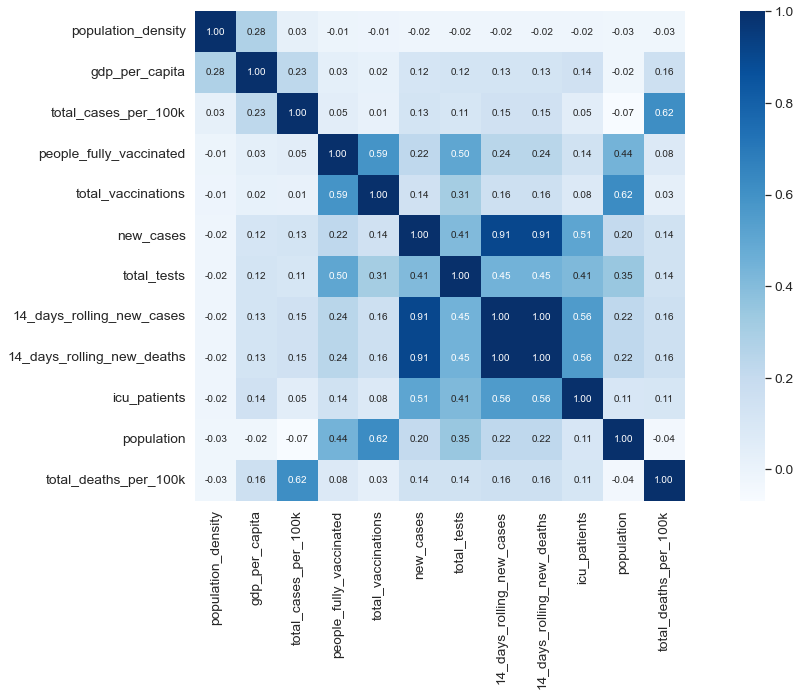

In [51]:
#Correlation of population density
corr = covid_data.corr()
plt.figure(figsize=(20, 9))
k = 12 #number of variables for heatmap
cols = corr.nlargest(k, 'population_density')['population_density'].index
cm = np.corrcoef(covid_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,cmap="Blues")
plt.show()



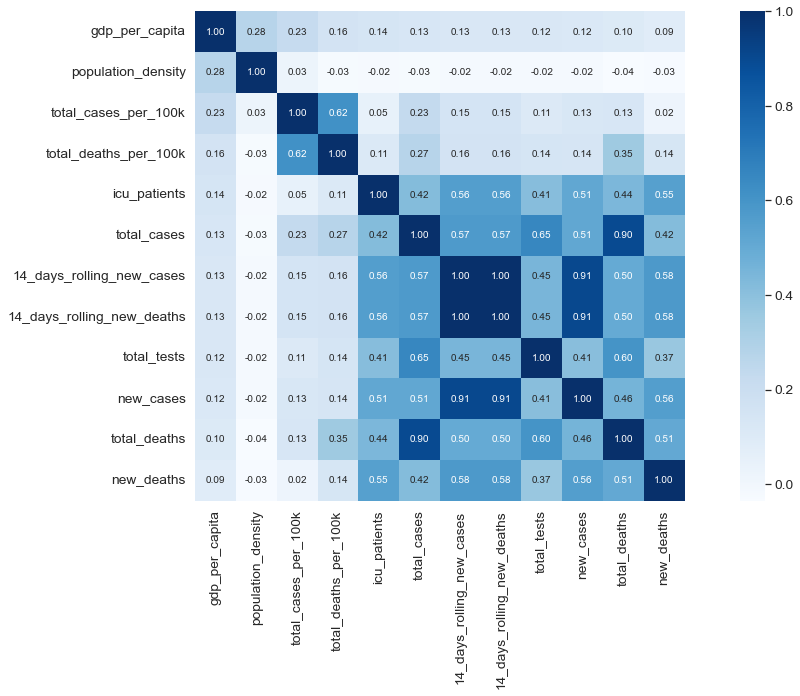

In [52]:
#Correlation of gdp
corr = covid_data.corr()
plt.figure(figsize=(20, 9))
k = 12 #number of variables for heatmap
cols = corr.nlargest(k, 'gdp_per_capita')['gdp_per_capita'].index
cm = np.corrcoef(covid_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,cmap="Blues")
plt.show()

In [53]:
pk = covid_data["iso_code"]+str(covid_data['date'])
print(pk)

#insert pk into covid_data
#del covid_data["pk"] #delete pk column
#covid_data.insert(0, 'pk', pk)


#covid_data["pk"]
covid_data.info()

9371      ABW9371     2020-03-13\n9372     2020-03-14\n9...
9372      ABW9371     2020-03-13\n9372     2020-03-14\n9...
9373      ABW9371     2020-03-13\n9372     2020-03-14\n9...
9374      ABW9371     2020-03-13\n9372     2020-03-14\n9...
9375      ABW9371     2020-03-13\n9372     2020-03-14\n9...
                                ...                        
217273    ZWE9371     2020-03-13\n9372     2020-03-14\n9...
217274    ZWE9371     2020-03-13\n9372     2020-03-14\n9...
217275    ZWE9371     2020-03-13\n9372     2020-03-14\n9...
217276    ZWE9371     2020-03-13\n9372     2020-03-14\n9...
217277    ZWE9371     2020-03-13\n9372     2020-03-14\n9...
Name: iso_code, Length: 203539, dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 203539 entries, 9371 to 217277
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   iso_code                    203539 non-null  

In [54]:
# Test gdp data using the iso code for USA
gdp_data_usa = gdp_data[gdp_data["Country_Code"]=="USA"]

gdp_data_usa.head(20)
print(gdp_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country_Name    266 non-null    object 
 1   Country_Code    266 non-null    object 
 2   Indicator_Name  266 non-null    object 
 3   Indicator_Code  266 non-null    object 
 4   2019            255 non-null    float64
 5   2020            251 non-null    float64
 6   2021            229 non-null    float64
 7   Unnamed:_66     0 non-null      float64
dtypes: float64(4), object(4)
memory usage: 16.8+ KB
None


In [55]:
#print(Country_lst_covid)

<h3>Basic Charts</h3>

In [56]:
# Set chart sizes to wide

plt.rcParams['figure.figsize'] = [15, 5]


Total Cases vs 14_days_rolling_new_cases for: USA


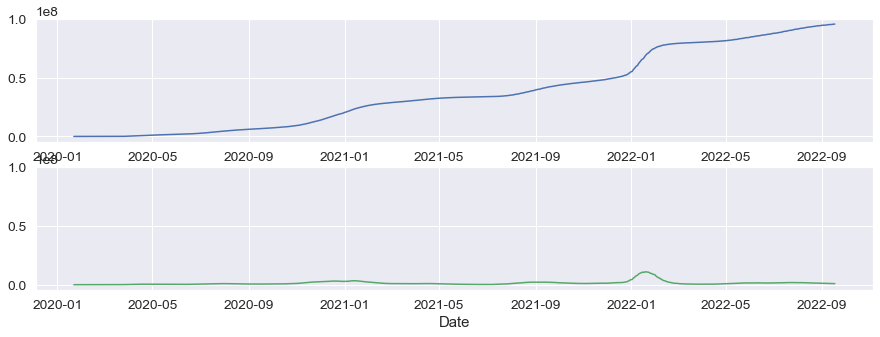

In [57]:
country_use_code = "USA"

#covid_data = covid_data.set_index("pk")

iso_use = country_use_code

print("Total Cases vs "+new_column+" for: "+iso_use)


# Basic plot of total covid cases over time
fig, ax=plt.subplots(2,1, sharey=True)


data=covid_data[covid_data["iso_code"]==iso_use]
data1=covid_data[covid_data["iso_code"]==iso_use]

ax[0].plot(data["date"], data["total_cases"], color='b')
ax[1].plot(data["date"], data[new_column], color='g') #using the new_column function above that identifies the name of the new column

ax[1].set_xlabel("Date")

plt.show()

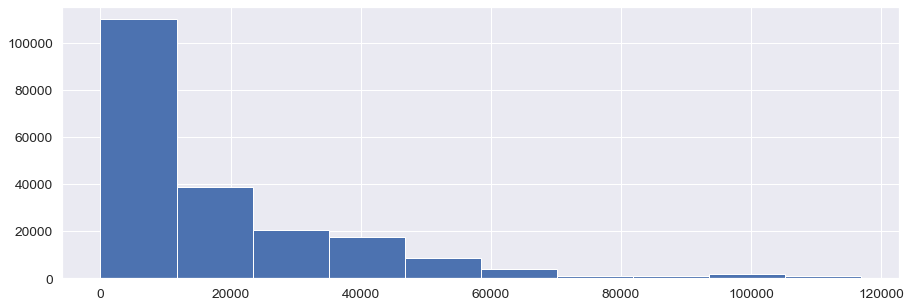

In [58]:
covid_data["gdp_per_capita"].hist(bins=10)
plt.show()

In [59]:
# Seaborn analysis

#Create a scatter plot: use the "end_date" to filter the covid_data 
#and pring back the total_deaths by country divided by the population *100,00
#compare to the gdp of the country and the population density, look for patterns in the top 20 and bottom 20


In [60]:
#covid_data[covid_data["date"].isin(["2020-12-31","2021-12-31","2022-09-15"])]#,last_date])]
#covid_data.loc[(df["date"]="2020-12-31")]


In [61]:
# create a subset of the COVID data for use with seaborn analysis

covid_data_small = covid_data[['date',
                               'iso_code',
                               'location',
                               'total_cases',
                               'total_cases_per_100k',
                               'total_deaths',
                               'total_deaths_per_100k',
                               'population',
                               'population_density',
                               'gdp_per_capita',
                               'extreme_poverty',
                               'people_fully_vaccinated',
                               'mortality'
                              ]]


#covid_data_small.fillna(0)
covid_data_small

print("last date to use: "+str(last_date))



last date to use: 2022-09-15 00:00:00


In [62]:
# select dates for analysis
covid_data_sns = covid_data_small[covid_data_small["date"].isin(["2020-12-31","2021-12-31",str(last_date)])]

print("covid_data_sns.shape") 
print(covid_data_sns.shape)                        
print(covid_data_sns.head())
print(covid_data_sns.tail())
print()
print("Null data")
print(covid_data_sns.isna().sum())
print()
print(covid_data_sns.corr())
## will need to update to use the total_cases/population*100,00 and total_deaths/population*100,00

covid_data_sns.shape
(658, 13)
            date iso_code     location  total_cases  total_cases_per_100k  \
9664  2020-12-31      ABW        Aruba       5489.0           5152.249005   
10029 2021-12-31      ABW        Aruba      20461.0          19205.714500   
10287 2022-09-15      ABW        Aruba      42970.0          40333.783885   
311   2020-12-31      AFG  Afghanistan      52330.0            130.500504   
676   2021-12-31      AFG  Afghanistan     158084.0            394.229728   

       total_deaths  total_deaths_per_100k  population  population_density  \
9664           49.0              45.993842    106536.0             584.800   
10029         181.0             169.895622    106536.0             584.800   
10287         228.0             214.012165    106536.0             584.800   
311          2189.0               5.458926  40099462.0              54.422   
676          7356.0              18.344386  40099462.0              54.422   

       gdp_per_capita  extreme_povert

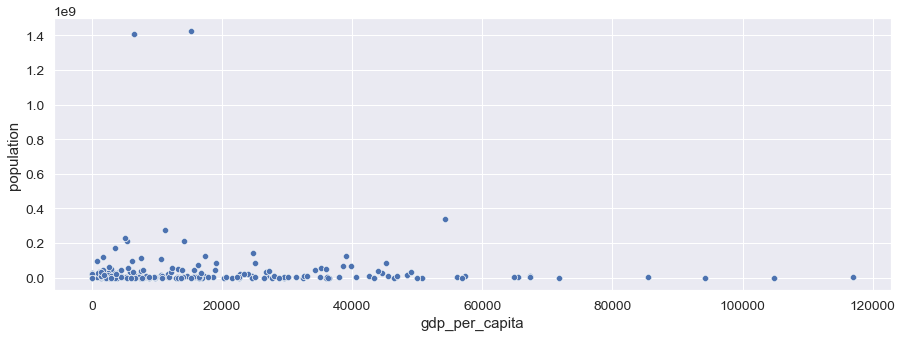

In [63]:
sns.scatterplot(x="gdp_per_capita",y="population",data=covid_data_sns)

plt.show()

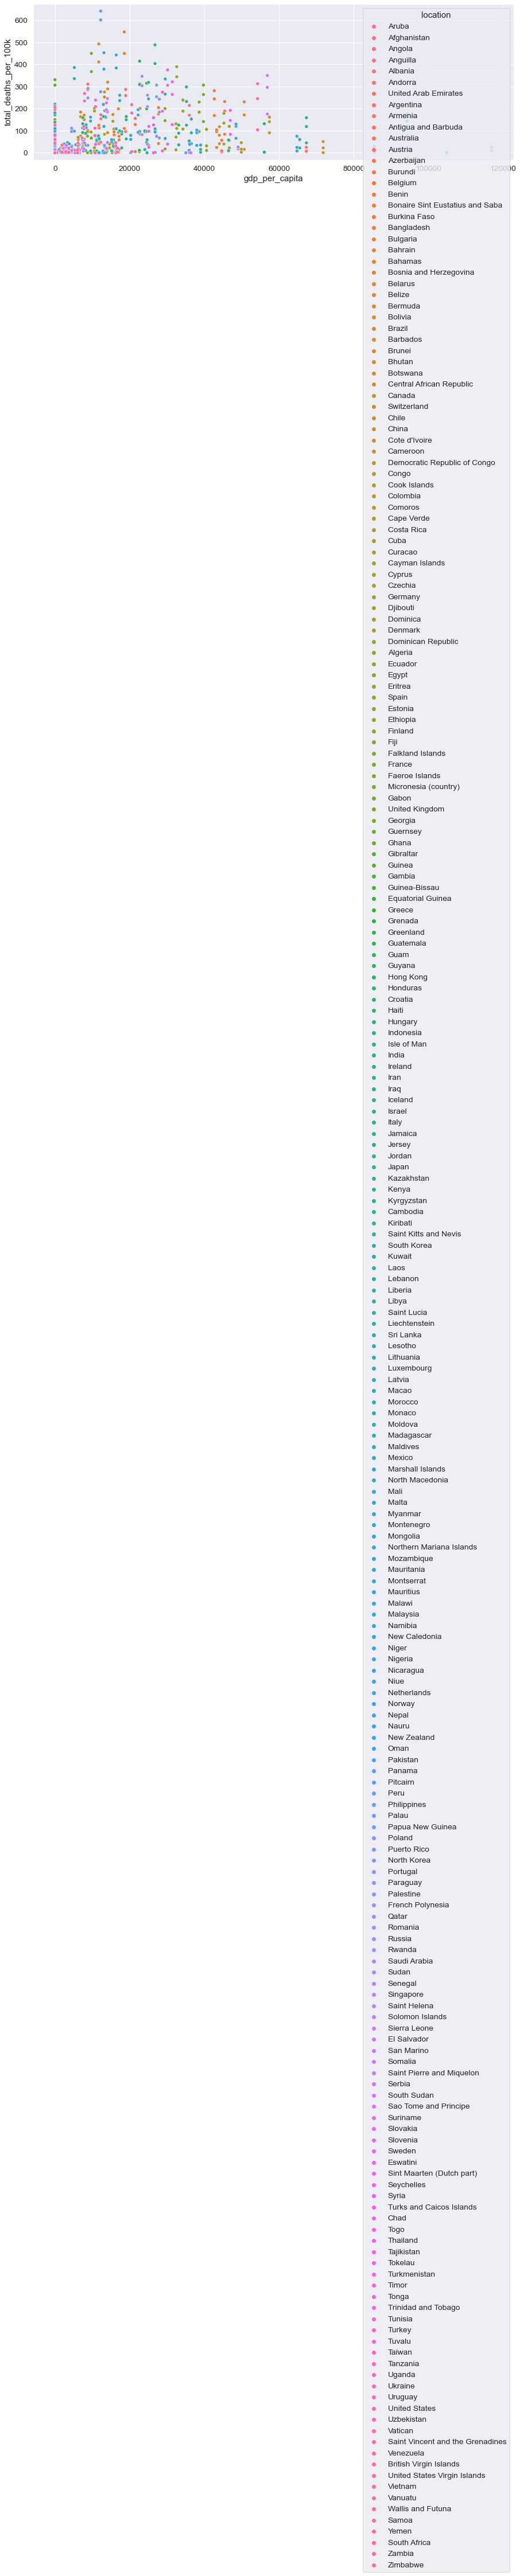

In [64]:
sns.scatterplot(x="gdp_per_capita",y="total_deaths_per_100k",data=covid_data_sns, hue="location")

plt.show()

In [65]:
#create data sets for each year
df_2020 = covid_data_sns[covid_data_sns["date"].isin(["2020-12-31"])]
df_2021 = covid_data_sns[covid_data_sns["date"].isin(["2021-12-31"])]
df_2022 = covid_data_sns[covid_data_sns["date"].isin(["2022-09-15"])]



In [66]:
# Top n data; use: top_n_parameter 
#https://datascientyst.com/get-top-10-highest-lowest-values-pandas/
#df.nlargest; df.nsmallest


#Top countries by cases and deaths:

df_2020 = covid_data_sns[covid_data_sns["date"].isin(["2020-12-31"])]
print(df_2020.info)
df_2021 = covid_data_sns[covid_data_sns["date"].isin(["2021-12-31"])]
df_2022 = covid_data_sns[covid_data_sns["date"].isin(["2022-09-15"])]

top_df_2020_cases_per_100k = df_2020.nlargest(n=top_n_parameter, columns=["total_cases_per_100k"])
print("top_df_2020_cases_per_100k")
print(top_df_2020_cases_per_100k)
print()

top_df_2020_deaths_per_100k = df_2020.nlargest(n=top_n_parameter, columns=["total_deaths_per_100k"])
print("top_df_2020_deaths_per_100k")
print(top_df_2020_deaths_per_100k)
print()

top_df_2021_cases_per_100k = df_2021.nlargest(n=top_n_parameter, columns=["total_cases_per_100k"])
print("top_df_2021_cases_per_100k")
print(top_df_2021_cases_per_100k)
print()

top_df_2021_deaths_per_100k = df_2021.nlargest(n=top_n_parameter, columns=["total_deaths_per_100k"])
print("top_df_2021_deaths_per_100k")
print(top_df_2021_deaths_per_100k)
print()

top_df_2022_cases_per_100k = df_2022.nlargest(n=top_n_parameter, columns=["total_cases_per_100k"])
print("top_df_2022_cases_per_100k")
print(top_df_2022_cases_per_100k)
print()

top_df_2022_deaths_per_100k = df_2022.nlargest(n=top_n_parameter, columns=["total_deaths_per_100k"])
print("top_df_2022_deaths_per_100k")
print(top_df_2022_deaths_per_100k)




<bound method DataFrame.info of              date iso_code      location  total_cases  total_cases_per_100k  \
9664   2020-12-31      ABW         Aruba       5489.0           5152.249005   
311    2020-12-31      AFG   Afghanistan      52330.0            130.500504   
4973   2020-12-31      AGO        Angola      17553.0             50.872696   
5877   2020-12-31      AIA      Anguilla         13.0             82.523964   
2195   2020-12-31      ALB       Albania      58316.0           2042.799444   
...           ...      ...           ...          ...                   ...   
167644 2020-12-31      WSM         Samoa          2.0              0.914227   
214826 2020-12-31      YEM         Yemen       2099.0              6.364147   
179973 2020-12-31      ZAF  South Africa    1057161.0           1779.964408   
215740 2020-12-31      ZMB        Zambia      20725.0            106.428732   
216652 2020-12-31      ZWE      Zimbabwe      13867.0             86.703843   

        total_death

In [67]:
# Bottom n data; use: top_n_parameter 
#https://datascientyst.com/get-top-10-highest-lowest-values-pandas/
#df.nlargest; df.nsmallest


bot_df_2020_cases_per_100k = df_2020.nsmallest(n=top_n_parameter, columns=["total_cases_per_100k"])
print("bot_df_2020_cases_per_100k")
print(top_df_2020_cases_per_100k)
print()

bot_df_2020_deaths_per_100k = df_2020.nsmallest(n=top_n_parameter, columns=["total_deaths_per_100k"])
print("bot_df_2020_deaths_per_100k")
print(top_df_2020_deaths_per_100k)
print()

bot_df_2021_cases_per_100k = df_2021.nsmallest(n=top_n_parameter, columns=["total_cases_per_100k"])
print("bot_df_2021_cases_per_100k")
print(top_df_2021_cases_per_100k)
print()

bot_df_2021_deaths_per_100k = df_2021.nsmallest(n=top_n_parameter, columns=["total_deaths_per_100k"])
print("bot_df_2021_deaths_per_100k")
print(top_df_2021_deaths_per_100k)
print()

bot_df_2022_cases_per_100k = df_2022.nsmallest(n=top_n_parameter, columns=["total_cases_per_100k"])
print("bot_df_2022_cases_per_100k")
print(top_df_2022_cases_per_100k)
print()

bot_df_2022_deaths_per_100k = df_2022.nsmallest(n=top_n_parameter, columns=["total_deaths_per_100k"])
print("bot_df_2022_deaths_per_100k")
print(top_df_2022_deaths_per_100k)


bot_df_2020_cases_per_100k
             date iso_code       location  total_cases  total_cases_per_100k  \
4061   2020-12-31      AND        Andorra       8049.0          10184.224511   
130236 2020-12-31      MNE     Montenegro      48247.0           7684.368624   
115740 2020-12-31      LUX     Luxembourg      46415.0           7260.046205   
168576 2020-12-31      SMR     San Marino       2333.0           6913.411960   
49975  2020-12-31      CZE        Czechia     718661.0           6837.390291   
15320  2020-12-31      BHR        Bahrain      92675.0           6333.439261   
75178  2020-12-31      GIB      Gibraltar       2040.0           6244.260790   
72367  2020-12-31      GEO        Georgia     227420.0           6051.655411   
205151 2020-12-31      USA  United States   20221641.0           6000.529250   
177397 2020-12-31      SVN       Slovenia     122152.0           5763.490783   

        total_deaths  total_deaths_per_100k   population  population_density  \
4061        

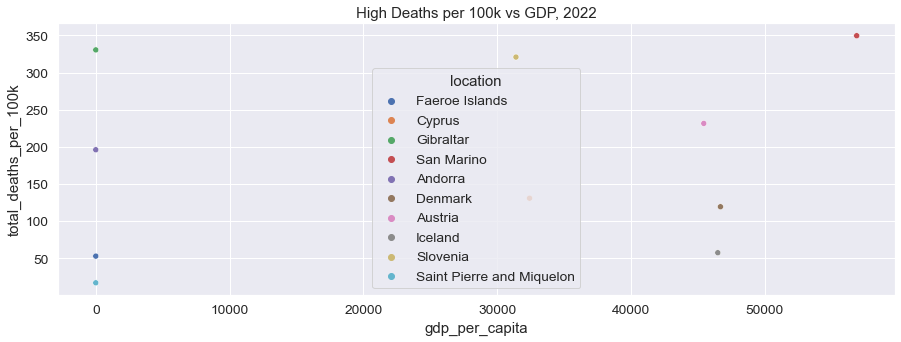

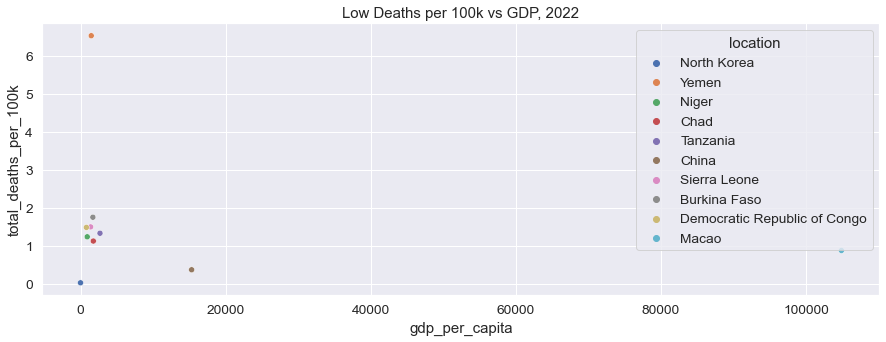

In [68]:
#Top Population and GDP per capita

#Top deaths vs gdp
sns.scatterplot(x="gdp_per_capita",y="total_deaths_per_100k",data=top_df_2022_cases_per_100k, hue="location")
plt.title("High Deaths per 100k vs GDP, 2022", size = 15)
plt.show()

#bottom deaths vs gdp
sns.scatterplot(x="gdp_per_capita",y="total_deaths_per_100k",data=bot_df_2022_cases_per_100k, hue="location")
plt.title("Low Deaths per 100k vs GDP, 2022", size = 15)
plt.show()

In [69]:
#what are the bands to use for calssifying the mortality rates as "Low" vs "High"
#use the top deaths from 2021 minimum value and the bot deaths from 2022 max value to set the thresholds

# min value in the Top mortality (top deaths) data
print("min 2020 top deaths/ 100k:"+str(top_df_2020_cases_per_100k["total_deaths_per_100k"].min()))
print("max 2020 top deaths/ 100k:"+str(top_df_2020_cases_per_100k["total_deaths_per_100k"].max()))
print("-"*100)

# max value in the bottom mortality (bottom deaths) data
print("max 2022 lowest deaths/ 100k:"+str(bot_df_2022_cases_per_100k["total_deaths_per_100k"].max()))
print("min 2022 lowest deaths/ 100k:"+str(bot_df_2022_cases_per_100k["total_deaths_per_100k"].min()))


min 2020 top deaths/ 100k:21.426385062748697
max 2020 top deaths/ 100k:174.83553606353345
----------------------------------------------------------------------------------------------------
max 2022 lowest deaths/ 100k:6.5339380778536755
min 2022 lowest deaths/ 100k:0.02310188288431166


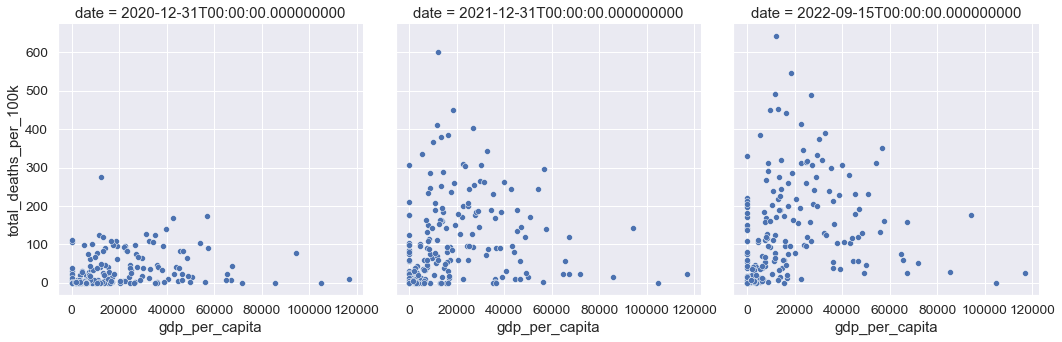

In [70]:
#Mortality per 100k and GDP per capita

#High mortality vs gdp
sns.relplot(x="gdp_per_capita",
            y="total_deaths_per_100k",
            data=covid_data_sns, 
            kind="scatter",
            col = "date")
plt.show()

#bottom deaths vs gdp
#sns.scatterplot(x="gdp_per_capita",y="total_deaths_per_100k",data=bot_df_2020_cases_per_100k, hue="location")
#plt.show()

we can observe from this that there are expected results that over time lower gdp per capita records had higher mortality per 100k of the population. However, there are some interesting results where lower gdp did not have a high mortality

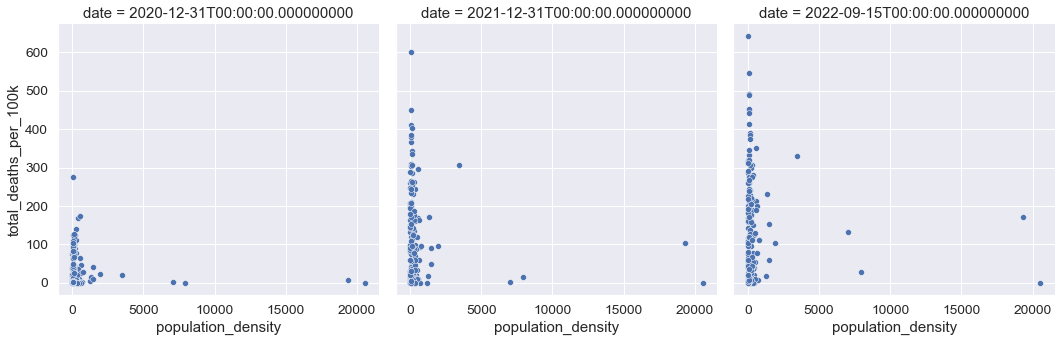

In [71]:
#Mortality per 100k and population density

#High mortality vs pop density
sns.relplot(x="population_density",
            y="total_deaths_per_100k",
            data=covid_data_sns, 
            kind="scatter",
            col = "date")
plt.show()

#bottom deaths vs gdp
#sns.scatterplot(x="gdp_per_capita",y="total_deaths_per_100k",data=bot_df_2020_cases_per_100k, hue="location")
#plt.show()

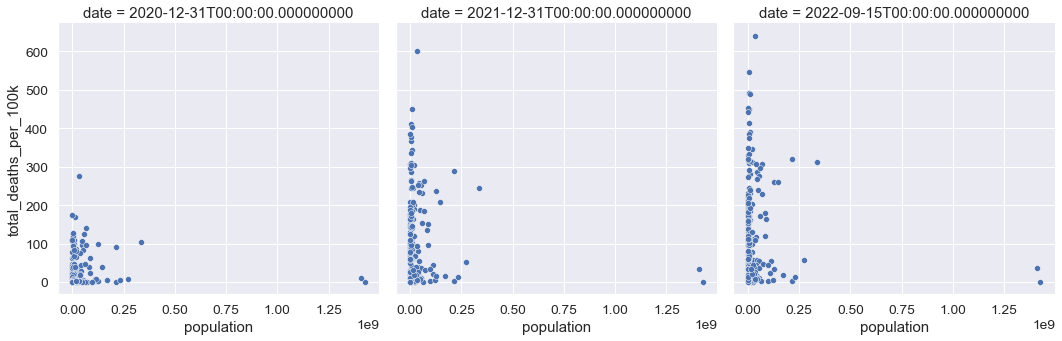

In [72]:
#Mortality vs population
sns.relplot(x="population",
            y="total_deaths_per_100k",
            data=covid_data_sns, 
            kind="scatter",
            col = "date")
plt.show()

#bottom Mortality vs gdp
#sns.scatterplot(x="gdp_per_capita",y="total_deaths_per_100k",data=bot_df_2020_cases_per_100k, hue="location")
#plt.show()

In [73]:
covid_temp = covid_data_sns
covid_temp.sort_values("population", axis = 0, ascending = False, inplace = True, na_position ='last')
covid_temp

C:\Users\Phillip\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,date,iso_code,location,total_cases,total_cases_per_100k,total_deaths,total_deaths_per_100k,population,population_density,gdp_per_capita,extreme_poverty,people_fully_vaccinated,mortality
40923,2022-09-15,CHN,China,978251.0,68.606177,5226.0,0.366507,1.425893e+09,147.674,15308.712,0.7,0.0,
40665,2021-12-31,CHN,China,115168.0,8.076901,4636.0,0.325129,1.425893e+09,147.674,15308.712,0.7,0.0,
40300,2020-12-31,CHN,China,93679.0,6.569846,4634.0,0.324989,1.425893e+09,147.674,15308.712,0.7,0.0,
90215,2022-09-15,IND,India,44522777.0,3163.108889,528273.0,37.531015,1.407564e+09,450.419,6426.674,21.2,945888274.0,
89592,2020-12-31,IND,India,10286709.0,730.816514,148994.0,10.585239,1.407564e+09,450.419,6426.674,21.2,0.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195753,2021-12-31,TKL,Tokelau,0.0,0.000000,0.0,0.000000,1.849000e+03,0.000,0.000,0.0,0.0,
211001,2022-09-15,VAT,Vatican,29.0,5675.146771,0.0,0.000000,5.110000e+02,0.000,0.000,0.0,0.0,
210378,2020-12-31,VAT,Vatican,27.0,5283.757339,0.0,0.000000,5.110000e+02,0.000,0.000,0.0,0.0,
210743,2021-12-31,VAT,Vatican,27.0,5283.757339,0.0,0.000000,5.110000e+02,0.000,0.000,0.0,0.0,


In [74]:
# Machine Learning
# use the top 20 and bottom 20 data sets combined to create the test for year ends and inluding the most recent date
#(between the last 12 months)

In [75]:
# Machine learning KNN data

In [76]:
covid_data_sns.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 658 entries, 40923 to 156534
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     658 non-null    datetime64[ns]
 1   iso_code                 658 non-null    object        
 2   location                 658 non-null    object        
 3   total_cases              658 non-null    float64       
 4   total_cases_per_100k     658 non-null    float64       
 5   total_deaths             658 non-null    float64       
 6   total_deaths_per_100k    658 non-null    float64       
 7   population               658 non-null    float64       
 8   population_density       658 non-null    float64       
 9   gdp_per_capita           658 non-null    float64       
 10  extreme_poverty          658 non-null    float64       
 11  people_fully_vaccinated  658 non-null    float64       
 12  mortality                658 

In [84]:
#convert date to string in covid_data_sns

covid_data_ml = covid_data_sns

covid_data_ml.style.format({"date": lambda t: t.strftime("%Y%m%d")}) # was "%d/%m/%Y"

#s = covid_data_ml['date']
#pd.to_numeric(s)
#covid_data_ml['date_flt']=covid_data_ml['date'].to_numeric(s) #astype(str)

covid_data_ml = covid_data_ml.drop(["date","iso_code","location"],axis=1)


covid_data_ml

,total_cases,total_cases_per_100k,total_deaths,total_deaths_per_100k,population,population_density,gdp_per_capita,extreme_poverty,people_fully_vaccinated,mortality
40923,978251.0,68.606177,5226.0,0.366507,1.425893e+09,147.674,15308.712,0.7,0.0,
40665,115168.0,8.076901,4636.0,0.325129,1.425893e+09,147.674,15308.712,0.7,0.0,
40300,93679.0,6.569846,4634.0,0.324989,1.425893e+09,147.674,15308.712,0.7,0.0,
90215,44522777.0,3163.108889,528273.0,37.531015,1.407564e+09,450.419,6426.674,21.2,945888274.0,
89592,10286709.0,730.816514,148994.0,10.585239,1.407564e+09,450.419,6426.674,21.2,0.0,
...,...,...,...,...,...,...,...,...,...,...
195753,0.0,0.000000,0.0,0.000000,1.849000e+03,0.000,0.000,0.0,0.0,
211001,29.0,5675.146771,0.0,0.000000,5.110000e+02,0.000,0.000,0.0,0.0,
210378,27.0,5283.757339,0.0,0.000000,5.110000e+02,0.000,0.000,0.0,0.0,
210743,27.0,5283.757339,0.0,0.000000,5.110000e+02,0.000,0.000,0.0,0.0,


In [85]:
#training and testing the data
#from datacamp

X = covid_data_ml.drop("mortality",axis=1).values #drop target value
y = covid_data_ml["mortality"].values #target observations

#split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=21,stratify=y)
knn = KNeighborsClassifier(n_neighbors=6)

#fit the classiier to the training data
knn.fit(X_train, y_train)

#print the accuracy
print(knn.score(X_test, y_test))

0.7575757575757576


In [86]:
#model complexity
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(a,z)


NameError: name 'a' is not defined

In [ ]:
# loop through neighbors array
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor]=knn.score(X-train, y_train)
    test_accuracies[neighbor]=knn.score(X_test,y_test)

In [ ]:
# plot training and test values
plt.figure(figuresize=(8,6))
plt.title("KNN: varying number of neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

#plt.show()









    
<h6>Notes</h6>
Linking to data
	Different sources 

Exploring, Understanding and Cleaning data
	Print summary statistics
	Print DataFrame information
	Inspect for missing values
	
	Use visuals to identify issues with the data?
	
	df.info()
	df.shape
	df.size
	df.isnull()
	df.corr()
	List of column headers
	
	Handle the missing values (replace with NaN)
	
Joining data
Using dictionaries
Using dataframes
	
Charting
	Build a chart
		Colour, size, types
	Can we build a dashboard
	Can we make the charts interactive
	Annotate anomalies
	Build a story
	
	
Dates
	COVID creating 14 day averages per 100k of the population
		New cases
		Total cases
		New deaths
		Total deaths
		
	Can we identify the dates of lockdowns and the impact on positive cases per 100k; how long after a lockdown did the rates come back down, can we compare to a country that did not implement lockdowns
	
		Total positive cases
		Cases in hospital 
		Cases in ICU
		Reproduction rate
		
	Is there a correlation between
		The GDP of a country and the fatality
		The population density and the fatality
![image.png](attachment:image.png)

<h2 style="color:#00008b;">Results</h2>

<h2 style="color:#00008b;">Insights</h2>

<h2 style="color:#00008b;">References</h2>
HTML Code help: <a href="https://www.w3schools.com/html/html_links.asp" target="_blank">W3 Schools</a> 

Our World in Data (OWID): <a href="https://ourworldindata.org/coronavirus#explore-the-global-situation" target="_blank">https://ourworldindata.org/coronavirus#explore-the-global-situation</a> 

The World Bank GDP: <a href="https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?year_high_desc=false" target="_blank">https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?year_high_desc=false</a>

Python:
    <p>formatting numbers: https://pythonguides.com/python-format-number-with-commas/#:~:text=Python%20format%20number%20with%20commas%20Let%20us%20see,comma%20to%20every%20thousand%20places%20starting%20from%20left.</p>
    <p>formatting dates: https://stackabuse.com/how-to-format-dates-in-python/</p>
    